# Sprint ディープラーニングフレームワーク2

## 目的
フレームワークのコードを読めるようにする  
フレームワークを習得し続けられるようになる  
理論を知っている範囲をフレームワークで動かす  

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import backend as K
from sklearn.preprocessing import StandardScaler
#グラフ表示に必要
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


### 【問題1】公式Exampleを分担して実行

以下に記述
https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/ja/tutorials/keras/basic_classification.ipynb#scrollTo=MhoQ0WE77laV

### 【問題2】Iris（2値分類）をKerasで学習

In [2]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") |
        (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y == 'Iris-versicolor'] = 0
y[y == 'Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

### Sequentialモデル

In [3]:
layer_size_0 = 20
layer_size_1 = 20
layer_size_2 = 1

#K.clear_session()
#インスタンス化
model = tf.keras.Sequential([tf.keras.layers.Dense(
    layer_size_0, activation=tf.nn.sigmoid, input_shape=(4,))
                            ,tf.keras.layers.Dense(
    layer_size_1, activation=tf.nn.sigmoid)
                            ,tf.keras.layers.Dense(
   layer_size_2, activation=tf.nn.sigmoid)
                            ])
#コンパイル
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                   validation_data=(X_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Train on 64 samples, validate on 16 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
64/64 [==============================] - 0s 5ms/sample - loss: 0.7122 - acc: 0.5469 - val_loss: 0.7339 - val_acc: 0.3750
Epoch 2/100
64/64 [==============================] - 0s 320us/sample - loss: 0.6979 - acc: 0.5312 - val_loss: 0.7927 - val_acc: 0.3750
Epoch 3/100
64/64 [==============================] - 0s 229us/sample - loss: 0.6935 - acc: 0.5312 - val_loss: 0.7194 - val_acc: 0.3750
Epoch 4/100
64/64 [==============================] - 0s 394us/sample - loss: 0.6678 - acc: 0.6562 - val_loss: 0.6570 - val_acc: 0.6250
Epoch 5/100
64/64 [==============================] - 0s 216us/sample - loss: 0.6802 - acc: 0.4688 - val_loss: 0.6397 - val_acc: 0.6250
Epoch 6/100
64/64 [==============================] - 0s 348us/sample - loss: 0.6670 - acc: 0.5938 - val_loss: 0.6739 - val_acc: 0.4375
Epoch 7/100
64/64 [=========

64/64 [==============================] - 0s 148us/sample - loss: 0.0653 - acc: 0.9844 - val_loss: 0.0285 - val_acc: 1.0000
Epoch 57/100
64/64 [==============================] - 0s 350us/sample - loss: 0.0648 - acc: 0.9844 - val_loss: 0.0372 - val_acc: 1.0000
Epoch 58/100
64/64 [==============================] - 0s 157us/sample - loss: 0.0728 - acc: 0.9531 - val_loss: 0.0323 - val_acc: 1.0000
Epoch 59/100
64/64 [==============================] - 0s 289us/sample - loss: 0.0714 - acc: 0.9688 - val_loss: 0.0653 - val_acc: 0.9375
Epoch 60/100
64/64 [==============================] - 0s 175us/sample - loss: 0.0844 - acc: 0.9688 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 61/100
64/64 [==============================] - 0s 314us/sample - loss: 0.0631 - acc: 0.9844 - val_loss: 0.0423 - val_acc: 1.0000
Epoch 62/100
64/64 [==============================] - 0s 165us/sample - loss: 0.0640 - acc: 0.9844 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 63/100
64/64 [==============================] - 0s 312u

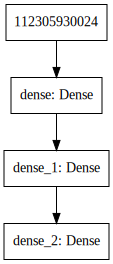

In [4]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Functional API

In [5]:
#K.clear_session()
input_data = tf.keras.layers.Input(shape=(4,))
x1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(input_data)
x2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x1)
y1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x2)
y2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x2)
z = tf.keras.layers.concatenate([x1, x2, y1])
z = tf.keras.layers.Dense(100, activation=tf.nn.relu)(z)
z = tf.keras.layers.concatenate([y2, z])
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(z)
model_2 = tf.keras.Model(inputs=input_data, outputs=output)

In [6]:
#コンパイル
model_2.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_2.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                   validation_data=(X_val, y_val))

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 0s 6ms/sample - loss: 1.1693 - acc: 0.5000 - val_loss: 0.6410 - val_acc: 0.9375
Epoch 2/10
64/64 [==============================] - 0s 462us/sample - loss: 0.6156 - acc: 0.6250 - val_loss: 0.5779 - val_acc: 0.9375
Epoch 3/10
64/64 [==============================] - 0s 486us/sample - loss: 0.6091 - acc: 0.6406 - val_loss: 0.6689 - val_acc: 0.3750
Epoch 4/10
64/64 [==============================] - 0s 287us/sample - loss: 0.5734 - acc: 0.6562 - val_loss: 0.5878 - val_acc: 0.5625
Epoch 5/10
64/64 [==============================] - 0s 312us/sample - loss: 0.4530 - acc: 0.7500 - val_loss: 0.3399 - val_acc: 0.8750
Epoch 6/10
64/64 [==============================] - 0s 512us/sample - loss: 0.2556 - acc: 0.9531 - val_loss: 0.1615 - val_acc: 0.9375
Epoch 7/10
64/64 [==============================] - 0s 422us/sample - loss: 0.1915 - acc: 0.9531 - val_loss: 0.0972 - val_acc: 0.9375
Epoch 8/10
64/64 [==

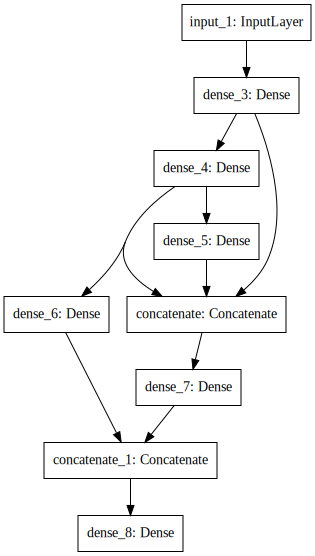

In [7]:
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

複雑な構造にしてみたが、accは下がった。

### ラッパーとしてのKeras
後回し

### 【問題3】Iris（多値分類）をKerasで学習

In [8]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# ３種全てなのでデータフレームから条件抽出しない

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y).reshape((-1, 1))
X = np.array(X)
# ラベルをone-hot encording
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories="auto", sparse=False, dtype=np.int)
y = enc.fit_transform(y)

#y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [9]:
#K.clear_session()
input_data = tf.keras.layers.Input(shape=(4,))
x1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(input_data)
x2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x1)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x2) #３値分類なので出力ユニットは３
model_3 = tf.keras.Model(inputs=input_data, outputs=output)

In [10]:
#コンパイル
model_3.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_3.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                   validation_data=(X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 0s 3ms/sample - loss: 0.7603 - acc: 0.6042 - val_loss: 0.7737 - val_acc: 0.7083
Epoch 2/10
96/96 [==============================] - 0s 293us/sample - loss: 0.5770 - acc: 0.7188 - val_loss: 0.4131 - val_acc: 0.7083
Epoch 3/10
96/96 [==============================] - 0s 289us/sample - loss: 0.3937 - acc: 0.7500 - val_loss: 0.3993 - val_acc: 0.7500
Epoch 4/10
96/96 [==============================] - 0s 184us/sample - loss: 0.2915 - acc: 0.9167 - val_loss: 0.3045 - val_acc: 0.9167
Epoch 5/10
96/96 [==============================] - 0s 220us/sample - loss: 0.1977 - acc: 0.9688 - val_loss: 0.2532 - val_acc: 0.9583
Epoch 6/10
96/96 [==============================] - 0s 309us/sample - loss: 0.1615 - acc: 0.9375 - val_loss: 0.2345 - val_acc: 0.8333
Epoch 7/10
96/96 [==============================] - 0s 305us/sample - loss: 0.1765 - acc: 0.9062 - val_loss: 0.2544 - val_acc: 0.9167
Epoch 8/10
96/96 [==

### 【問題4】House PricesをKerasで学習

In [11]:
# データセットの読み込み
dataset_path = "train.csv"
df = pd.read_csv(dataset_path)
# ３種全てなのでデータフレームから条件抽出しない

y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y).reshape((-1, 1))
X = np.array(X)

#対数変換
y = np.log10(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [12]:
#K.clear_session()
input_data = tf.keras.layers.Input(shape=(2,))
x1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(input_data)
x2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x1)
output = tf.keras.layers.Dense(1,)(x2)
model_4 = tf.keras.Model(inputs=input_data, outputs=output)

In [13]:
#コンパイル
model_4.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

history = model_4.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                   validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 934 samples, validate on 234 samples
Epoch 1/10
934/934 [==============================] - 0s 456us/sample - loss: 1.9711 - mean_squared_error: 1.9711 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 2/10
934/934 [==============================] - 0s 184us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 3/10
934/934 [==============================] - 0s 180us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 4/10
934/934 [==============================] - 0s 169us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 5/10
934/934 [==============================] - 0s 177us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 6/10
934/934 [==============================] - 0s 183us/sample - loss

### 【問題5】MNISTをKerasで学習

In [14]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [16]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [17]:
#K.clear_session()
input_data = tf.keras.layers.Input(shape=(784,))
x1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(input_data)
x2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x1)
output = tf.keras.layers.Dense(10,activation=tf.nn.softmax)(x2)
model_5 = tf.keras.Model(inputs=input_data, outputs=output)

In [18]:
#コンパイル
model_5.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_5.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                   validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 262us/sample - loss: 0.3751 - acc: 0.8970 - val_loss: 0.2740 - val_acc: 0.9290
Epoch 2/10
48000/48000 [==============================] - 12s 254us/sample - loss: 0.2834 - acc: 0.9300 - val_loss: 0.2535 - val_acc: 0.9422
Epoch 3/10
48000/48000 [==============================] - 12s 253us/sample - loss: 0.2499 - acc: 0.9403 - val_loss: 0.2589 - val_acc: 0.9388
Epoch 4/10
48000/48000 [==============================] - 12s 256us/sample - loss: 0.2407 - acc: 0.9467 - val_loss: 0.2317 - val_acc: 0.9487
Epoch 5/10
48000/48000 [==============================] - 12s 258us/sample - loss: 0.2243 - acc: 0.9493 - val_loss: 0.2316 - val_acc: 0.9478
Epoch 6/10
48000/48000 [==============================] - 12s 256us/sample - loss: 0.2290 - acc: 0.9498 - val_loss: 0.2816 - val_acc: 0.9407
Epoch 7/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.2168 - acc: 0.9514 